In [1]:
import pandas as pd
import numpy as ny
import matplotlib.pyplot as plt
import seaborn as sns
from datasets import load_dataset
import ast
dataset=load_dataset('lukebarousse/data_jobs')
df=dataset['train'].to_pandas()
df['job_posted_date']=pd.to_datetime(df['job_posted_date'])
df.info()
df['job_skills']=df['job_skills'].apply(lambda salary: ast.literal_eval(salary) if pd.notna(salary) else salary)

Using the latest cached version of the dataset since lukebarousse/data_jobs couldn't be found on the Hugging Face Hub
Found the latest cached dataset configuration 'default' at C:\Users\mathe\.cache\huggingface\datasets\lukebarousse___data_jobs\default\0.0.0\1d815e9ce232eb27db11939c44eb048fe6d2e9ab (last modified on Tue Sep  3 20:03:08 2024).


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 785741 entries, 0 to 785740
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   job_title_short        785741 non-null  object        
 1   job_title              785740 non-null  object        
 2   job_location           784696 non-null  object        
 3   job_via                785733 non-null  object        
 4   job_schedule_type      773074 non-null  object        
 5   job_work_from_home     785741 non-null  bool          
 6   search_location        785741 non-null  object        
 7   job_posted_date        785741 non-null  datetime64[ns]
 8   job_no_degree_mention  785741 non-null  bool          
 9   job_health_insurance   785741 non-null  bool          
 10  job_country            785692 non-null  object        
 11  salary_rate            33067 non-null   object        
 12  salary_year_avg        22003 non-null   floa

In [2]:
df.job_title_short

0         Senior Data Engineer
1                 Data Analyst
2                Data Engineer
3                Data Engineer
4                Data Engineer
                  ...         
785736       Software Engineer
785737            Data Analyst
785738        Business Analyst
785739           Data Engineer
785740       Software Engineer
Name: job_title_short, Length: 785741, dtype: object

In [3]:
df_DA_ind=df[(df['job_country']=='India')&(df['job_title_short']=='Data Analyst')].copy()
df_DA_ind['job_posted_month_no']=df_DA_ind['job_posted_date'].dt.month

In [18]:
df_exploded=df_DA_ind.explode('job_skills')

In [19]:
df_month_skills=df_exploded.pivot_table(index='job_posted_month_no',columns='job_skills',aggfunc='size',fill_value=0)
df_month_skills.loc['total']=df_month_skills.sum()
df_month_skills

job_skills,airflow,alteryx,angular,ansible,arch,asana,asp.net,assembly,atlassian,aurora,...,vue.js,watson,webex,windows,wire,word,workfront,wrike,yarn,zoom
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,3,21,1,0,0,0,1,0,0,0,...,0,0,1,4,1,37,0,0,0,3
2,7,17,1,0,2,0,0,1,0,1,...,0,1,1,5,0,24,0,0,0,0
3,6,16,2,1,0,0,0,1,1,0,...,0,0,0,5,0,27,0,0,0,2
4,8,8,1,0,4,0,1,2,0,0,...,0,0,1,4,0,27,0,0,0,1
5,5,13,0,0,1,0,0,0,0,0,...,0,0,0,5,0,13,0,0,0,0
6,5,22,1,0,0,0,1,0,0,1,...,0,0,0,1,0,12,1,0,0,1
7,10,13,2,0,1,0,0,0,0,1,...,0,4,0,4,0,22,0,0,0,2
8,19,25,2,0,0,0,0,0,2,0,...,0,1,0,4,0,31,0,0,1,1
9,4,14,0,0,0,2,0,0,1,5,...,0,0,0,2,0,28,0,0,1,2


In [20]:
df_month_skills=df_month_skills[df_month_skills.loc['total'].sort_values(ascending=False).index]
df_month_skills=df_month_skills.drop('total')
df_month_skills


job_skills,sql,python,excel,tableau,power bi,r,sas,azure,aws,powerpoint,...,hugging face,fastapi,kotlin,powerbi,mariadb,sqlite,clickup,suse,twilio,centos
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,305,216,218,159,98,89,128,46,32,43,...,0,1,0,0,0,0,0,0,1,0
2,209,148,156,116,75,67,82,26,33,25,...,0,0,0,0,0,0,0,0,0,0
3,229,151,138,125,76,58,62,45,38,29,...,0,0,0,1,0,0,0,1,0,0
4,204,143,138,98,83,56,52,40,31,28,...,0,0,0,0,0,0,0,0,0,0
5,155,101,106,71,61,42,30,33,22,19,...,0,0,0,0,0,0,0,0,0,1
6,193,150,115,114,77,76,74,37,32,24,...,0,0,0,0,0,0,0,0,0,0
7,245,161,174,124,93,67,78,39,31,31,...,1,0,1,0,0,0,0,0,0,0
8,317,216,192,152,127,112,98,52,63,40,...,0,0,0,0,0,0,0,0,0,0
9,341,229,228,195,168,100,92,35,41,29,...,0,0,0,0,0,0,0,0,0,0


In [26]:
month_value=df_DA_ind.groupby('job_posted_month_no').size()
df_DA_percent=df_month_skills.div(month_value/100,axis=0)

In [28]:
df_DA_percent=df_DA_percent.reset_index()
df_DA_percent['job_posted_month']=df_DA_percent['job_posted_month_no'].apply(lambda x: pd.to_datetime(x,format='%m').strftime('%b'))
df_DA_percent=df_DA_percent.set_index('job_posted_month')
df_DA_percent=df_DA_percent.drop(columns='job_posted_month_no')

In [30]:
df_DA_percent

job_skills,sql,python,excel,tableau,power bi,r,sas,azure,aws,powerpoint,...,hugging face,fastapi,kotlin,powerbi,mariadb,sqlite,clickup,suse,twilio,centos
job_posted_month,,,,,,,,,,,,,,,,,,,,,
Jan,48.566879,34.394904,34.713376,25.318471,15.605096,14.171975,20.382166,7.324841,5.095541,6.847134,...,0.000000,0.159236,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.159236,0.000000
Feb,48.267898,34.180139,36.027714,26.789838,17.321016,15.473441,18.937644,6.004619,7.621247,5.773672,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
Mar,54.265403,35.781991,32.701422,29.620853,18.009479,13.744076,14.691943,10.663507,9.004739,6.872038,...,0.000000,0.000000,0.000000,0.236967,0.0,0.000000,0.000000,0.236967,0.000000,0.000000
Apr,48.803828,34.210526,33.014354,23.444976,19.856459,13.397129,12.440191,9.569378,7.416268,6.698565,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
May,55.755396,36.330935,38.129496,25.539568,21.942446,15.107914,10.791367,11.870504,7.913669,6.834532,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.359712
Jun,52.588556,40.871935,31.335150,31.062670,20.980926,20.708447,20.163488,10.081744,8.719346,6.539510,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
Jul,53.610503,35.229759,38.074398,27.133479,20.350109,14.660832,17.067834,8.533917,6.783370,6.783370,...,0.218818,0.000000,0.218818,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
Aug,51.294498,34.951456,31.067961,24.595469,20.550162,18.122977,15.857605,8.414239,10.194175,6.472492,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
Sep,54.126984,36.349206,36.190476,30.952381,26.666667,15.873016,14.603175,5.555556,6.507937,4.603175,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000


(10.0, 70.0)

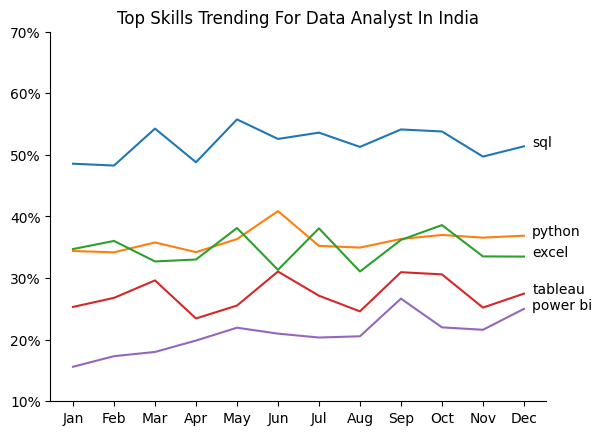

In [48]:
sns.lineplot(data=df_DA_percent.iloc[:,:5],dashes=False,palette='tab10')
plt.title('Top Skills Trending For Data Analyst In India')
plt.xlabel('')
plt.legend().remove()
for i in range(5):
    plt.text(11.2,df_DA_percent.iloc[-1,i],df_DA_percent.columns[i])
sns.despine()
from matplotlib.ticker import PercentFormatter
ax=plt.gca()
ax.yaxis.set_major_formatter(PercentFormatter(decimals=0))
plt.ylim(10,70)